IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score



UPLOADING DATA

In [ ]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [ ]:
train_data.head(10)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
test_data.head(10)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [ ]:
print(train_data.shape)
print(test_data.shape)


(159571, 8)
(153164, 2)


DATA PREPROCESSING

In [ ]:
train_data.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [ ]:
test_data.isnull().sum()

,0
id,0
comment_text,0


In [ ]:
notoxic_labels = train_data[(train_data['toxic'] != 1) &
                             (train_data['severe_toxic'] != 1) &
                             (train_data['obscene'] != 1) &
                             (train_data['threat'] != 1) &
                             (train_data['insult'] != 1) &
                             (train_data['identity_hate'] != 1)]
print('Percentage of non-toxic comments is ', len(notoxic_labels) / len(train_data) * 100)

Percentage of non-toxic comments is  89.83211235124176


In [ ]:
cols = ['obscene', 'insult', 'toxic', 'severe_toxic', 'identity_hate', 'threat']
train_data['none'] = 1-train_data[cols].max(axis=1)
cols_with_none = cols + ['none']
# calculating the sum of each toxicity label in the training dataset. By summing each column in cols.
print(train_data[cols_with_none].sum())


obscene            8449
insult             7877
toxic             15294
severe_toxic       1595
identity_hate      1405
threat              478
none             143346
dtype: int64


In [ ]:
# Defining the contractions dictionary
contractions = {
    "what's": "what is",
    "'s": "",
    "'ve": " have",
    "n't": " not",
    "i'm": "i am",
    "'re": " are",
    "'d": " would",
    "'ll": " will",
    "'scuse": " excuse"
}

for df in (train_data, test_data):
    # Converting to lowercase
    df["comment_text_preprocessed"] = df["comment_text"].str.lower()

    # Replacing contractions
    for contraction, replacement in contractions.items():
        df['comment_text_preprocessed'] = df['comment_text_preprocessed'].str.replace(contraction, replacement, regex=True)

    # Removing non-word characters
    df['comment_text_preprocessed'] = df['comment_text_preprocessed'].str.replace('\W', ' ', regex=True)

    # Removing extra spaces
    df['comment_text_preprocessed'] = df['comment_text_preprocessed'].str.replace('\s+', ' ', regex=True)




In [ ]:
prepocessed_col = ["comment_text", "comment_text_preprocessed"]
display(train_data[prepocessed_col].sample(5))
display(test_data[prepocessed_col].sample(5))

,comment_text,comment_text_preprocessed
17373,? \n\ndont sheeple Wikipedians get it? i will ...,dont sheeple wikipedians get it i will never ...
60828,"""\n\n Harry's Law \n\nThe TV By the Numbers ar...",harry law the tv by the numbers article stati...
133578,"It might not have been your intention, but you...",it might not have been your intention but your...
83800,One minorities rarely win.,one minorities rarely win
73760,"""NN, POV Material is not notable, and appears...",nn pov material is not notable and appears to...


,comment_text,comment_text_preprocessed
2147,for that and for the redirect Vahide Gördüm,for that and for the redirect vahide gördüm
31776,I think I understand what you're saying and yo...,i think i understand what you are saying and y...
137722,Dont fucking edit my page again. u fucking wanker,dont fucking edit my page again u fucking wanker
146271,""" March 2010 (UTC) \n\n :::I don't know if it ...",march 2010 utc i do not know if it was that y...
78120,REDIRECT Talk:Exhaust Gas Recirculation versus...,redirect talk exhaust gas recirculation versus...


VISUALIZATIONS

<ipython-input-12-e0ac39a24bb8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels_counts.index, y=labels_counts.values, palette='Set2')


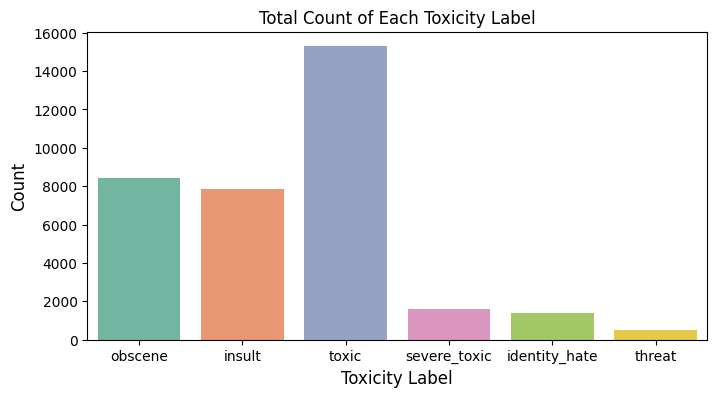

In [ ]:
labels_counts = train_data[cols].sum()

# Creating a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=labels_counts.index, y=labels_counts.values, palette='Set2')
plt.title('Total Count of Each Toxicity Label', fontsize=12)
plt.xlabel('Toxicity Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

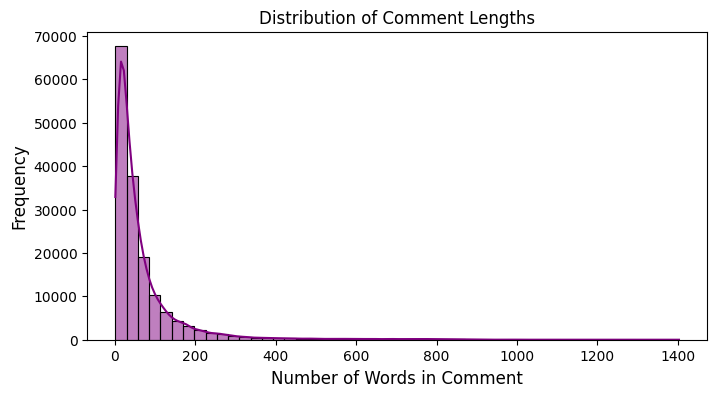

In [ ]:
train_df = train_data.copy()

# Calculating the length of each comment in terms of the number of words
train_df['comment_length'] = train_df['comment_text_preprocessed'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 4))
# Using histplot to plot the distribution of comment lengths
sns.histplot(train_df['comment_length'], bins=50, kde=True, color='purple')
plt.title("Distribution of Comment Lengths", fontsize=12)
plt.xlabel("Number of Words in Comment", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

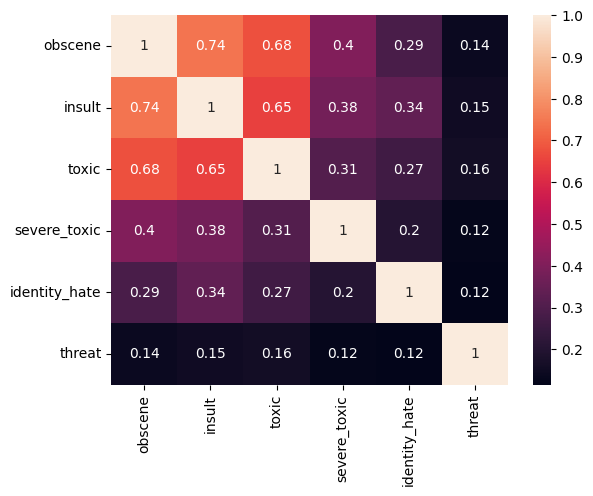

In [ ]:
data = train_df[cols]
sns.heatmap(data.astype(float).corr(), annot=True)
plt.show()

In [ ]:

X = train_data['comment_text_preprocessed']
y = train_data[cols]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train)
print(y_train)
print(X_val)
print(y_val)

54568      conflict of interest note by your user name i...
3786       update actually i changed this to something b...
22938     mrca article sniperz11 thanks for your comment...
137856    arguing that bart and caltrain should get more...
143038     blocked hi i blocked you for 24 hours for bei...
                                ...                        
119879    redirect talk john loveday experimental physic...
103694    back it up post the line here with the reference 
131932    i wo not stop that sometimes germanic equals g...
146867     british bands i think you have mistaken scott...
121958    you are wrong justin thompson is mentioned in ...
Name: comment_text_preprocessed, Length: 111699, dtype: object
        obscene  insult  toxic  severe_toxic  identity_hate  threat
54568         0       0      0             0              0       0
3786          0       0      0             0              0       0
22938         0       0      0             0              0       0
13785

FEATURE ENGINEERING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=200000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fitting and transforming the training data
X_val_tfidf = tfidf_vectorizer.transform(X_val)          # Transforming the validation data


In [ ]:
print(X_train_tfidf)
print(X_val_tfidf)

  (0, 33467)	0.3666805343838997
  (0, 95457)	0.13839108148939147
  (0, 141441)	0.12194110424029653
  (0, 14062)	0.1676736045161094
  (0, 113641)	0.21988986485020717
  (0, 32745)	0.35942953351651385
  (0, 98373)	0.19482982833709486
  (0, 111270)	0.12945635598316527
  (0, 60714)	0.16352533945227
  (0, 51663)	0.24803549167808292
  (0, 25721)	0.27523720384626926
  (0, 145720)	0.14537666999400634
  (0, 34422)	0.15045705719682698
  (0, 112467)	0.20289302699307932
  (0, 148881)	0.16760940478115294
  (0, 120963)	0.2279382424242976
  (0, 102658)	0.2677001734615349
  (0, 133635)	0.11301086797230088
  (0, 62128)	0.16296709119642636
  (0, 45941)	0.12298392808151486
  (0, 101677)	0.34062973316023115
  (1, 141032)	0.42043471141948613
  (1, 8908)	0.291276984728015
  (1, 28868)	0.3450176560684019
  (1, 22193)	0.7869912252385253
  :	:
  (111697, 18685)	0.35902026715991936
  (111697, 148262)	0.13602134441497232
  (111697, 24575)	0.3152670003941903
  (111697, 92212)	0.14916073751062106
  (111697, 96042)	

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression classifier for each class
lr_model = LogisticRegression(max_iter=1000)
metrics_lr = {}


# Training the model for each class
for label in cols:
    lr_model.fit(X_train_tfidf, y_train[label])  # Fitting the model for each label

print("Model training completed.")


Model training completed.


In [ ]:
# Now, making predictions on the validation set and evaluating metrics
metrics_lr = {}
for label in cols:
    preds = lr_model.predict(X_val_tfidf)  # Making predictions on the validation set
    preds_proba = lr_model.predict_proba(X_val_tfidf)[:, 1]  # Getting predicted probabilities for the positive class

    # Calculating metrics
    metrics_lr[label] = {
        'accuracy': accuracy_score(y_val[label], preds),
        'f1': f1_score(y_val[label], preds),
        'precision': precision_score(y_val[label], preds),
        'recall': recall_score(y_val[label], preds),
        'roc_auc': roc_auc_score(y_val[label], preds_proba)
    }
print("Logistic Regression Model Evaluation Metrics:")
print(pd.DataFrame(metrics_lr))


Logistic Regression Model Evaluation Metrics:
            obscene    insult     toxic  severe_toxic  identity_hate    threat
accuracy   0.946691  0.950138  0.904830      0.989681       0.990433  0.997243
f1         0.013148  0.013229  0.012142      0.042636       0.008658  0.204819
precision  0.566667  0.533333  0.933333      0.366667       0.066667  0.566667
recall     0.006651  0.006697  0.006111      0.022634       0.004630  0.125000
roc_auc    0.924179  0.908007  0.875979      0.968606       0.927628  0.974199


MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Initializing the Multinomial Naive Bayes model
naive_bayes = MultinomialNB()


# Training the model for each class
for label in cols:
    # Fitting the model using TF-IDF features from the training set
    naive_bayes.fit(X_train_tfidf, y_train[label])  # Use appropriate DataFrame for labels

print("Model training completed.")


Model training completed.


In [ ]:
# Dictionary to store evaluation metrics
metrics_nb = {}
for label in cols:
    preds = naive_bayes.predict(X_val_tfidf)         # Making predictions on the validation set
    preds_proba = naive_bayes.predict_proba(X_val_tfidf)[:, 1]

    # Calculating metrics
    metrics_nb[label] = {
        'accuracy': accuracy_score(y_val[label], preds),
        'f1': f1_score(y_val[label], preds),
        'precision': precision_score(y_val[label], preds),
        'recall': recall_score(y_val[label], preds),
        'roc_auc': roc_auc_score(y_val[label], preds_proba)
    }
print("Naive Bayes Model Evaluation Metrics:")
print(pd.DataFrame(metrics_nb))


Naive Bayes Model Evaluation Metrics:
            obscene    insult     toxic  severe_toxic  identity_hate    threat
accuracy   0.946629  0.950117  0.904307      0.989827       0.990955  0.997180
f1         0.000782  0.000837  0.000436      0.000000       0.000000  0.014599
precision  1.000000  1.000000  1.000000      0.000000       0.000000  1.000000
recall     0.000391  0.000419  0.000218      0.000000       0.000000  0.007353
roc_auc    0.697713  0.702732  0.679477      0.788297       0.728007  0.785881


SVM

In [ ]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

# Creating a LinearSVC model
svm_model = LinearSVC(max_iter=2000)

# Wrapping the LinearSVC with CalibratedClassifierCV to enable probability prediction (for roc-auc)
svm_model_calibrated = CalibratedClassifierCV(svm_model, method='sigmoid', cv='prefit')

# Training an SVM model for each class
svm_metrics = {}

for label in cols:
    # Fitting the LinearSVC model
    svm_model.fit(X_train_tfidf, y_train[label])
    # Calibrating the model (this will allow us to use predict_proba)
    svm_model_calibrated.fit(X_train_tfidf, y_train[label])
    # Making predictions
    preds = svm_model.predict(X_val_tfidf)
    preds_proba = svm_model_calibrated.predict_proba(X_val_tfidf)[:, 1]

    # Storing the evaluation metrics for each label
    svm_metrics[label] = {
        'accuracy': accuracy_score(y_val[label], preds),
        'f1': f1_score(y_val[label], preds),
        'precision': precision_score(y_val[label], preds),
        'recall': recall_score(y_val[label], preds),
        'roc_auc': roc_auc_score(y_val[label], preds_proba)
    }

print("SVM Model Evaluation Metrics:")
print(pd.DataFrame(svm_metrics))


SVM Model Evaluation Metrics:
            obscene    insult     toxic  severe_toxic  identity_hate    threat
accuracy   0.979215  0.970651  0.960018      0.990245       0.991999  0.997389
f1         0.782419  0.660218  0.766357      0.369771       0.351946  0.358974
precision  0.886961  0.781787  0.869529      0.537255       0.654088  0.593220
recall     0.699922  0.571369  0.685072      0.281893       0.240741  0.257353
roc_auc    0.979939  0.964069  0.963470      0.966348       0.955356  0.966797


RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Dictionary to store evaluation metrics
rf_metrics = {}

for label in cols:
    rf_model = RandomForestClassifier(n_estimators=10, random_state=42, class_weight='balanced')
    rf_model.fit(X_train_tfidf, y_train[label])  # Fit the model

    # Making predictions and calculating metrics
    preds = rf_model.predict(X_val_tfidf)
    preds_proba = rf_model.predict_proba(X_val_tfidf)[:, 1]  # Probabilities for the positive class

    # Calculate evaluation metrics
    rf_metrics[label] = {
        'accuracy': accuracy_score(y_val[label], preds),
        'f1': f1_score(y_val[label], preds),
        'precision': precision_score(y_val[label], preds),
        'recall': recall_score(y_val[label], preds),
        'roc_auc': roc_auc_score(y_val[label], preds_proba)  # Adding ROC-AUC score
    }

# Displaying Random Forest model evaluation metrics
print("Random Forest Model Evaluation Metrics:")
print(pd.DataFrame(rf_metrics))


Random Forest Model Evaluation Metrics:
            obscene    insult     toxic  severe_toxic  identity_hate    threat
accuracy   0.964760  0.962838  0.938524      0.989367       0.979612  0.997180
f1         0.603898  0.483599  0.599537      0.182986       0.039370  0.105960
precision  0.755138  0.788826  0.796169      0.416058       0.034247  0.533333
recall     0.503130  0.348681  0.480794      0.117284       0.046296  0.058824
roc_auc    0.949268  0.931916  0.916295      0.880230       0.800963  0.779934


RECURRENT NEURAL NETWORKS WITH LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizing and padding the text data
max_words = 200000  # Maximum number of words to consider
max_len = 100  # Maximum length of sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

# Creating and compiling an RNN model with LSTM
rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 128, input_length=max_len))
rnn_model.add(LSTM(64, return_sequences=False))
rnn_model.add(Dropout(0.5))
rnn_model.add(Dense(len(cols), activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
y_train_array = y_train.values
y_val_array = y_val.values

history = rnn_model.fit(
    X_train_pad, y_train_array,
    epochs=5,
    batch_size=32,
    validation_data=(X_val_pad, y_val_array)
)

# Evaluating the model
loss, accuracy = rnn_model.evaluate(X_val_pad, y_val_array)
print(f"RNN Model - Loss: {loss}, Accuracy: {accuracy}")


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3491/3491 ━━━━━━━━━━━━━━━━━━━━ 1675s 479ms/step - accuracy: 0.1412 - loss: 0.1146 - val_accuracy: 0.0367 - val_loss: 0.0510
Epoch 2/5
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 1676s 480ms/step - accuracy: 0.0405 - loss: 0.0460 - val_accuracy: 0.0367 - val_loss: 0.0523
Epoch 3/5
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 1724s 486ms/step - accuracy: 0.0471 - loss: 0.0359 - val_accuracy: 0.0368 - val_loss: 0.0534
Epoch 4/5
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 1690s 483ms/step - accuracy: 0.0779 - loss: 0.0299 - val_accuracy: 0.0376 - val_loss: 0.0573
Epoch 5/5
3491/3491 ━━━━━━━━━━━━━━━━━━━━ 1716s 487ms/step - accuracy: 0.1392 - loss: 0.0250 - val_accuracy: 0.0408 - val_loss: 0.0647
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.0403 - loss: 0.0630
RNN Model - Loss: 0.06471062451601028, Accuracy: 0.040817178785800934


In [ ]:
y_val_pred_probs = rnn_model.predict(X_val_pad)
# Calculating and print ROC-AUC for each label individually
for i, col in enumerate(cols):
    auc = roc_auc_score(y_val_array[:, i], y_val_pred_probs[:, i])
    print(f"ROC-AUC for {col}: {auc}")


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step
ROC-AUC for obscene: 0.9833587728447952
ROC-AUC for insult: 0.9737725318316577
ROC-AUC for toxic: 0.9611289125475071
ROC-AUC for severe_toxic: 0.9817814867442747
ROC-AUC for identity_hate: 0.953181845684217
ROC-AUC for threat: 0.9610004226678103


PREDICTING ON TEST DATA USING RNN MODEL

In [ ]:
X_test = test_data[['id','comment_text_preprocessed']]


In [ ]:
X_test = test_data['comment_text_preprocessed']

# Tokenizing and padding the test data
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
predictions = rnn_model.predict(X_test_pad, batch_size=128)

# thresholding to convert probabilities to binary labels
threshold = 0.5
predictions_binary = (predictions > threshold).astype(int)
print(f"Shape of predictions: {predictions_binary.shape}")

# Creating a DataFrame for the test data and predictions
test_predictions_df = pd.DataFrame(predictions_binary, columns=cols)
test_predictions_df['id'] = test_data['id']

# Reordering columns so that 'id' is the first column
test_predictions_df = test_predictions_df[['id'] + cols]

# Saving predictions to a CSV file
test_predictions_df.to_csv("test_predictions.csv", index=False)
print(test_predictions_df.head())

Shape of test data after padding: (153164, 100)
1197/1197 ━━━━━━━━━━━━━━━━━━━━ 96s 80ms/step
Shape of predictions: (153164, 6)
                 id  obscene  insult  toxic  severe_toxic  identity_hate  \
0  00001cee341fdb12        1       1      1             1              1   
1  0000247867823ef7        0       0      0             0              0   
2  00013b17ad220c46        0       0      0             0              0   
3  00017563c3f7919a        0       0      0             0              0   
4  00017695ad8997eb        0       0      0             0              0   

   threat  
0       0  
1       0  
2       0  
3       0  
4       0  
